In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

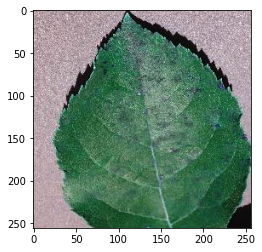

In [53]:
filename = 'Plant_leaf_diseases_dataset_with_augmentation/Plant_leave_diseases_dataset_with_augmentation/Apple___Apple_scab/image (5).JPG'
img = cv2.imread(filename, -1)
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.imshow(img)

In [54]:
# In images, img[y, x]

# shadow (lower V in HSV)
print(img[120,80])
print(img[120,70])
print(img[120,20])

# not a shadow - better intensities
print(img[120,125])
print(img[120,170])
print(img[150,80])

[ 60 112  75]
[ 64 121  83]
[144 126 133]
[113 159 136]
[110 150 125]
[ 64 115  77]


In [55]:
# background
print(img[230, 80])
print(img[230, 80][2])

[21 78 40]
40


[177 157 162]


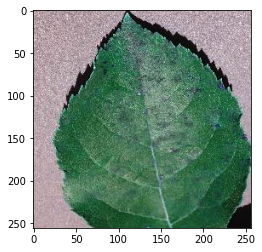

In [56]:
# define range of shadow color in HSV
upper_shadow = np.array([360,360,50])
lower_shadow = np.array([0,20,0])
# Threshold the HSV image to get only shadow colors
mask = cv2.inRange(hsv, lower_shadow, upper_shadow)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(img, img, mask= mask)
plt.imshow(img)
print(img[10,10])

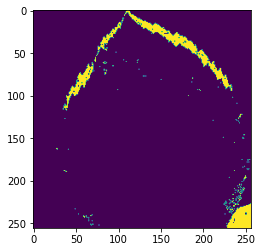

In [57]:
plt.imshow(mask)

255
255
255


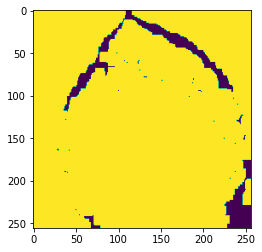

In [58]:
res = cv2.cvtColor(res,cv2.COLOR_BGR2RGB)
plt.imshow(res)
res_gray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
ret_otsu,im_bw_otsu = cv2.threshold(res_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu)
print(im_bw_otsu[0,0])
print(im_bw_otsu[100,60])
print(im_bw_otsu[100,200])

kernel = np.ones((10,10),np.uint8)
    
# Closing the small holes
opening = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)

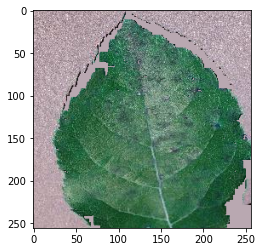

In [59]:

for y in range(len(img)):
    for x in range(len(img)):
        if(opening[y, x] == 0):
            img[y, x] = [185, 168, 177] # random backgroung pixel to substitute the shadow
plt.imshow(img)

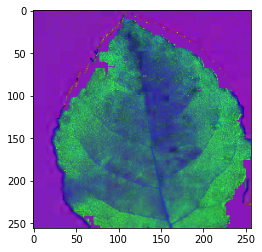

In [60]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

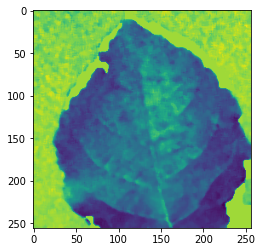

In [61]:
main_img = cv2.imread(filename)
gray_scale_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
# Explore alternative filters

#blur = cv2.GaussianBlur(gray_scale_img, (25,25),0)
blur = cv2.medianBlur(gray_scale_img,5) # used to remove salt-and-pepper noise
#blur = cv2.bilateralFilter(gray_scale_img,9,75,75)
plt.imshow(blur)

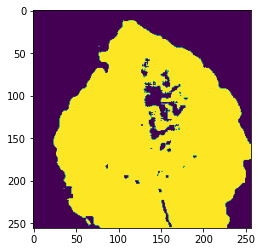

In [62]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu)

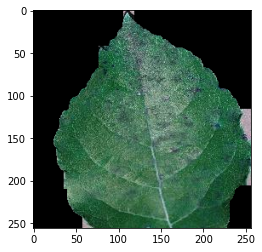

In [63]:
kernel = np.ones((25,25),np.uint8)

# Closing the small holes
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

#Shape features
contours, _ = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
M = cv2.moments(cnt)
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)

current_frame = main_img
filtered_image = closing/255

#Elementwise Multiplication of range bounded filtered_image with current_frame
current_frame[0:current_frame.shape[0], 0:current_frame.shape[1], 0] = np.multiply(current_frame[0:current_frame.shape[0], 0:current_frame.shape[1], 0], filtered_image) #B channel
current_frame[0:current_frame.shape[0], 0:current_frame.shape[1], 1] = np.multiply(current_frame[0:current_frame.shape[0], 0:current_frame.shape[1], 1], filtered_image) #G channel
current_frame[0:current_frame.shape[0], 0:current_frame.shape[1], 2] = np.multiply(current_frame[0:current_frame.shape[0], 0:current_frame.shape[1], 2], filtered_image) #R channel

img = current_frame
plt.imshow(img)